In [108]:
import numpy as np
import pandas as pd

In [109]:
df = pd.read_csv(r'Desktop\Deep_learning\Neural_network\ANN(ArtificialNeuralNetwork)\Admission_Predict.csv')

In [110]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_train)

In [113]:
df.duplicated().sum()

0

In [114]:
df.drop(columns=['Serial No.'], inplace=True)

In [115]:
X=df.drop(columns=['Chance of Admit '])
y=df['Chance of Admit ']

In [116]:
y.shape

(400,)

In [117]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)

In [118]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [119]:
model = Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))

model.add(Dense(1,activation='linear'))

C:\Users\jroun\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [120]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [121]:
model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['accuracy'])

In [122]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0000e+00 - loss: 0.3443 - val_accuracy: 0.0000e+00 - val_loss: 0.2404
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.2101 - val_accuracy: 0.0000e+00 - val_loss: 0.1299
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.1075 - val_accuracy: 0.0000e+00 - val_loss: 0.0689
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0616 - val_accuracy: 0.0000e+00 - val_loss: 0.0454
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0391 - val_accuracy: 0.0000e+00 - val_loss: 0.0422
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0396 - val_accuracy: 0.0000e+00 - val_loss: 0.0430
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0385 - val_accuracy: 0.0000e+00 - val_loss: 0.0409
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e

In [123]:
y_predm = model.predict(X_test_scaled)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step


In [124]:
y_predm

array([[0.5810375 ],
       [0.9221816 ],
       [0.70841527],
       [0.61866397],
       [0.7149835 ],
       [0.575058  ],
       [0.7301695 ],
       [0.91657686],
       [0.6750193 ],
       [0.7275801 ],
       [0.48252255],
       [0.71123374],
       [0.7613951 ],
       [0.82635576],
       [0.5731441 ],
       [0.59155214],
       [0.6363583 ],
       [0.7148124 ],
       [0.84785056],
       [0.85067534],
       [0.8019318 ],
       [0.56112427],
       [0.59275025],
       [0.5071977 ],
       [0.73047817],
       [0.8394102 ],
       [0.74104697],
       [0.63763225],
       [0.864708  ],
       [0.74539244],
       [0.8784044 ],
       [0.41441262],
       [0.9000044 ],
       [0.76886714],
       [0.64230984],
       [0.547598  ],
       [0.75702643],
       [0.7793845 ],
       [0.6975262 ],
       [0.7698674 ],
       [0.6642045 ],
       [0.62637055],
       [0.60903585],
       [0.7619051 ],
       [0.82071936],
       [0.57677853],
       [0.9330828 ],
       [0.851

In [125]:
y_test_i = y_test_i[:320]  # Select only the first 320 samples

In [126]:
from sklearn.metrics import r2_score
r2_score(y_test_i,y_predm)

-0.8224862783956448

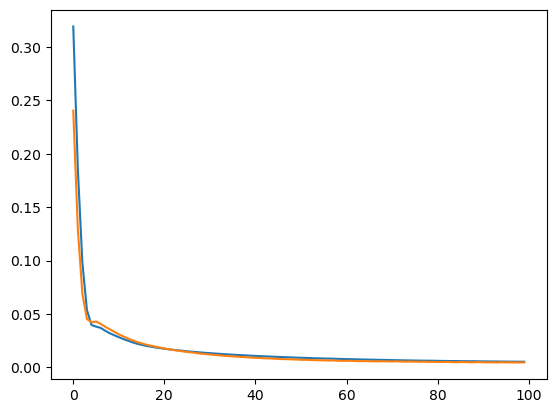

In [127]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])